In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix

/home/manish/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.


In [2]:
df = pd.read_csv('/home/manish/Desktop/IIT(ISM)/Project/7th_sem/Paper and Dataset/finalwormholeDataset.csv')

In [3]:
df.head()

,duration,protocol,Plength,flag,Mlength,HoP,LifeTime,MsgType,DSN,Sno,...,land,Tmode,Neighbors,Hflow,AvgFlow,Lflow,AvgHopCount,failedConnection,Failed Rate,Label
0,0.000000,AODV,84,0,28,0,2000,Route Reply,0,0,...,0,1,8,6367,1319.25,5,0.24832,2700,59.960027,normal
1,0.000978,ICMP,92,-1,28,-1,-1,-1,-1,0,...,2,0,8,6367,1319.25,5,0.24832,2700,59.960027,attack
2,0.028177,AODV,76,0,20,-1,-1,Route Error,0,1,...,2,1,8,6367,1319.25,5,0.24832,2700,59.960027,normal
3,0.001886,AODV,76,0,20,-1,-1,Route Error,0,1,...,2,1,8,6367,1319.25,5,0.24832,2700,59.960027,normal
4,0.001973,ICMP,92,-1,20,-1,-1,-1,-1,2,...,2,0,8,6367,1319.25,5,0.24832,2700,59.960027,attack


In [4]:
df.shape

(637862, 21)

In [5]:
df = df.sample(frac=1)

In [6]:
df.head()

,duration,protocol,Plength,flag,Mlength,HoP,LifeTime,MsgType,DSN,Sno,...,land,Tmode,Neighbors,Hflow,AvgFlow,Lflow,AvgHopCount,failedConnection,Failed Rate,Label
261669,0.001482,AODV,76,0,20,-1,-1,Route Error,0,10,...,2,1,15,7092,2056.733333,25,0.200747,4628,59.585426,normal
314765,0.001079,ICMP,92,-1,20,-1,-1,-1,-1,3,...,2,0,10,6184,1734.500000,301,0.216141,3621,57.889688,attack
613664,0.000914,AODV,84,0,28,0,2000,Route Reply,0,14,...,0,0,13,7764,1487.230769,2,0.179579,4239,69.548811,attack
378460,0.000979,ICMP,92,-1,28,-1,-1,-1,-1,9,...,2,0,16,7097,1926.312500,25,0.197682,4733,59.647133,attack
266821,0.000090,AODV,84,0,28,0,2000,Route Reply,1,6,...,0,1,15,7092,2056.733333,25,0.200747,4628,59.585426,normal


In [7]:
df.shape

(637862, 21)

In [8]:
df.describe()

,duration,Plength,flag,Mlength,HoP,LifeTime,Sno,Sindex,land,Tmode,Neighbors,Hflow,AvgFlow,Lflow,AvgHopCount,failedConnection,Failed Rate
count,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000
mean,0.014189,89.589435,110.839263,25.770104,-0.766843,404.101061,9.819489,1429.758499,1.631633,0.251398,13.758746,7236.509479,1671.795566,61.917407,0.204938,4342.024985,62.910107
std,0.096779,32.584956,1133.951488,32.609399,0.578324,980.532344,9.727308,1139.028021,0.763185,0.433817,2.826686,645.978748,276.146268,107.105989,0.017860,699.159048,4.434745
min,0.000000,66.000000,-1.000000,10.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,6142.000000,1001.300000,1.000000,0.179579,2700.000000,56.927251
25%,0.000999,84.000000,-1.000000,20.000000,-1.000000,-1.000000,4.000000,484.000000,2.000000,0.000000,12.000000,6634.000000,1483.150000,4.000000,0.190776,3741.000000,59.463764
50%,0.001229,92.000000,-1.000000,28.000000,-1.000000,-1.000000,8.000000,1078.000000,2.000000,0.000000,14.000000,7260.000000,1722.500000,5.000000,0.197682,4491.000000,62.595632
75%,0.001830,92.000000,0.000000,28.000000,-1.000000,-1.000000,12.000000,2254.000000,2.000000,1.000000,15.000000,7759.000000,1918.769231,27.000000,0.216141,4733.000000,68.344537
max,0.938905,1104.000000,16384.000000,1048.000000,6.000000,14984.000000,125.000000,4095.000000,2.000000,1.000000,20.000000,8194.000000,2056.733333,303.000000,0.248320,5624.000000,72.685851


In [9]:
df.replace({'normal':0, 'attack':1 }, inplace = True)

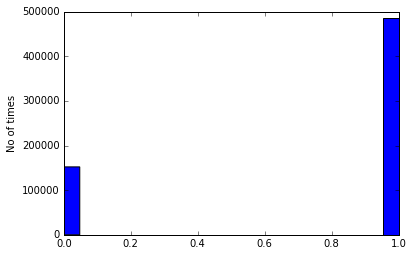

No. of normals:  152144
No. of attacks:  485718


In [10]:
plt.hist(df['Label'], bins='auto')
plt.ylabel('No of times')
plt.show()
print('No. of normals: ', len(df[df['Label']==0]))
print('No. of attacks: ', len(df[df['Label']==1]))

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1857: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


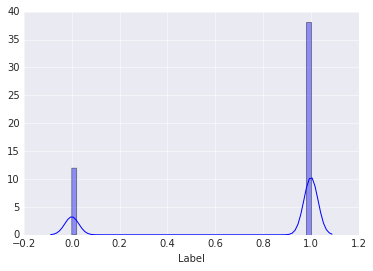

In [11]:
sns.set_style('darkgrid')
sns.distplot(df['Label'])
plt.show()

In [12]:
for x in df.columns:
    print(x,' ',df[x].dtype)

duration   float64
protocol   object
Plength   int64
flag   int64
Mlength   int64
HoP   int64
LifeTime   int64
MsgType   object
DSN   object
Sno   int64
Sindex   int64
land   int64
Tmode   int64
Neighbors   int64
Hflow   int64
AvgFlow   float64
Lflow   int64
AvgHopCount   float64
failedConnection   int64
Failed Rate   float64
Label   int64


In [13]:
df.isnull().sum()

duration            0
protocol            0
Plength             0
flag                0
Mlength             0
HoP                 0
LifeTime            0
MsgType             0
DSN                 0
Sno                 0
Sindex              0
land                0
Tmode               0
Neighbors           0
Hflow               0
AvgFlow             0
Lflow               0
AvgHopCount         0
failedConnection    0
Failed Rate         0
Label               0
dtype: int64

In [14]:
for column in df.columns:
    if(df[column].dtype=='object'):
        print(column)

protocol
MsgType
DSN


In [15]:
pd.unique(df['protocol'].values)

array(['AODV', 'ICMP', 'UDP'], dtype=object)

In [16]:
df.replace({'AODV':0, 'ICMP':1, 'UDP':2 }, inplace = True)

In [17]:
pd.unique(df['MsgType'].values)

array(['Route Error', '-1', 'Route Reply', 'Route Reply Acknowledgment',
       'Route Request'], dtype=object)

In [18]:
df.replace({'Route Reply':0, '-1':1, 'Route Error':2, 'Route Request':3, 'Route Reply Acknowledgment':4}, inplace = True)

In [19]:
pd.unique(df['DSN'].values)

array(['0', 1, '1', '2', '3', '1,0', '4', '2,2', '1,3', '0,0', '0,1',
       '0,2', '0,0,0', '0,3', '2,0', '1,1', '1,2'], dtype=object)

In [20]:
df['DSN'].describe()

count     637862
unique        17
top            1
freq      441222
Name: DSN, dtype: int64

In [21]:
df.drop(['DSN'], axis=1, inplace=True)

In [22]:
df.shape

(637862, 20)

In [23]:
y = df['Label']
df.drop(['Label'], axis=1, inplace=True)
print('y-shape: ', y.shape)
print('x-shape: ', df.shape)

y-shape:  (637862,)
x-shape:  (637862, 19)


In [24]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

In [25]:
print('x-train: ', x_train.shape)
print('y-train: ', y_train.shape)
print('x-test: ', x_test.shape)
print('y-train: ', y_train.shape)

x-train:  (427367, 19)
y-train:  (427367,)
x-test:  (210495, 19)
y-train:  (427367,)


## Basic neural network

In [26]:
model = Sequential()
model.add(Dense(12, input_dim=19, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model.fit(x_train,y_train, epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
427367/427367 [==============================] - 13s 31us/step - loss: 3.8052 - acc: 0.7613
Epoch 2/5
427367/427367 [==============================] - 12s 28us/step - loss: 3.8052 - acc: 0.7613
Epoch 3/5
427367/427367 [==============================] - 12s 28us/step - loss: 3.8052 - acc: 0.7613
Epoch 4/5
427367/427367 [==============================] - 12s 27us/step - loss: 3.8052 - acc: 0.7613
Epoch 5/5
427367/427367 [==============================] - 12s 27us/step - loss: 3.8052 - acc: 0.7613


In [31]:
accuracy = model.evaluate(x_train, y_train)
print('Accuracy: train %.2f' % (accuracy[1]*100))

427367/427367 [==============================] - 4s 10us/step
Accuracy: train 76.13


In [32]:
accuracy = model.evaluate(x_test, y_test)
print('Accuracy: test %.2f' % (accuracy[1]*100))

210495/210495 [==============================] - 2s 11us/step
Accuracy: test 76.18


In [33]:
# Y_predict = model.predict(x_test)
# print(Y_predict)
# cm = np.array(confusion_matrix(y_test, Y_predict, labels=[0,1]))
# confusion = pd.DataFrame(cm, index = ['attack', 'normal'],
#                         columns = ['pred_attack','pred_normal'])
# confusion

## Feature selection using pearson correlation

In [34]:
df['Label'] = y

In [35]:
df.shape

(637862, 20)

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:19: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.6.1

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


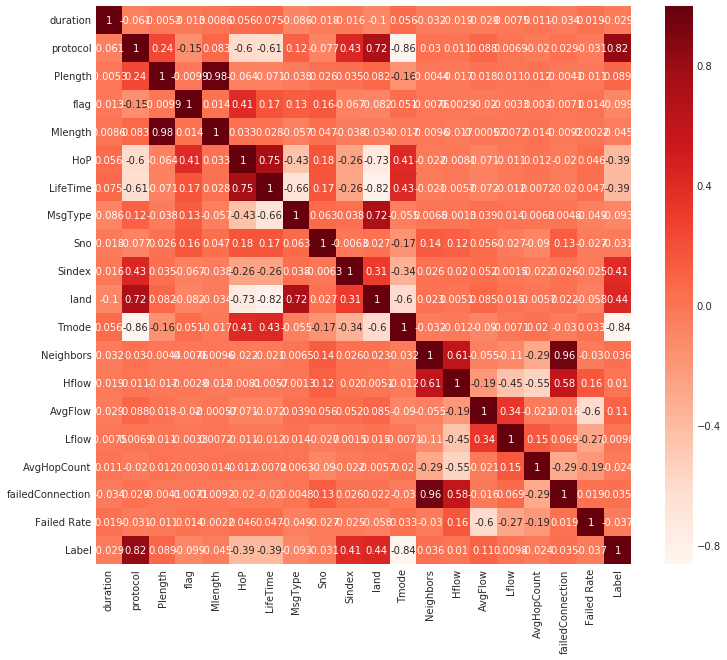

In [36]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [37]:
cor_target = abs(cor['Label'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

protocol    0.820096
Tmode       0.844137
Label       1.000000
Name: Label, dtype: float64

In [38]:
X_new = x_train[['protocol','Tmode']]

In [39]:
X_new.shape

(427367, 2)

In [40]:
clf = Sequential()
clf.add(Dense(12, input_dim=2, activation='relu'))
clf.add(Dense(8, activation='relu'))
clf.add(Dense(1, activation='sigmoid'))

In [41]:
clf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
clf.fit(X_new,y_train, epochs=1)

Epoch 1/1
427367/427367 [==============================] - 13s 31us/step - loss: 0.2070 - acc: 0.9397


In [43]:
accuracy = clf.evaluate(X_new, y_train)
print('Accuracy: train %.2f' % (accuracy[1]*100))

427367/427367 [==============================] - 5s 11us/step
Accuracy: train 94.22


In [44]:
X_new_test = x_test[['protocol','Tmode']]
X_new_test.shape

(210495, 2)

In [45]:
accuracy = clf.evaluate(X_new_test, y_test)
print('Accuracy: test %.2f' % (accuracy[1]*100))

210495/210495 [==============================] - 2s 11us/step
Accuracy: test 94.20


## Feature selection using tree based method

In [46]:
ETC = ExtraTreesClassifier()
ETC.fit(x_train, y_train)
print(ETC.feature_importances_)

[0.00742226 0.19600017 0.01215676 0.02488806 0.00254518 0.04508327
 0.00612698 0.11977333 0.08683206 0.05943547 0.0458278  0.37546136
 0.00142745 0.00397743 0.00409512 0.0022352  0.0022158  0.00177124
 0.00272505]


In [47]:
ETC_model = SelectFromModel(ETC, prefit=True)
X_new = ETC_model.transform(x_train)
X_new.shape               

/home/manish/.local/lib/python3.5/site-packages/sklearn/utils/__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


(427367, 5)

In [50]:
clf2 = Sequential()
clf2.add(Dense(12, input_dim=5, activation='relu'))
clf2.add(Dense(8, activation='relu'))
clf2.add(Dense(1, activation='sigmoid'))

In [51]:
clf2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
clf2.fit(X_new,y_train, epochs=1)

Epoch 1/1
427367/427367 [==============================] - 13s 31us/step - loss: 0.1724 - acc: 0.9474


In [53]:
accuracy = clf2.evaluate(X_new, y_train)
print('Accuracy: train %.2f' % (accuracy[1]*100))

427367/427367 [==============================] - 5s 11us/step
Accuracy: train 97.32


In [54]:
X_new_test = ETC_model.transform(x_test)
X_new_test.shape

/home/manish/.local/lib/python3.5/site-packages/sklearn/utils/__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


(210495, 5)

In [55]:
accuracy = clf2.evaluate(X_new_test, y_test)
print('Accuracy: test %.2f' % (accuracy[1]*100))

210495/210495 [==============================] - 2s 11us/step
Accuracy: test 97.28
